# Los Angeles Robbery Analysis Final Report
#### Team Outliers: Jennifer Zhao, Charles Bi, Bowen Liu, Jingfan Lu

## Table of Content
### Part I: Background Information
### Part II: Exploratory Data Analysis
#### 2.1 Data Cleaning & Processing
#### 2.2 Variable Relations
   * 2.2.1   Where? (variables: 'AreaName' & 'PremiseDescription')
   * 2.2.2   How? (variable: 'WeaponDescription')
   * 2.2.3   Who? (variables: 'VictimAge', 'VictimGender' & 'VictimDescent')

#### 2.3 Trend Analysis
   * 2.3.1   When? (within a day, within a week, within a year, over years)
   * 2.3.2   Why? (hypotheses: GDP, Unemployment Rate, CPI)   

#### 2.4 Special Section: Junvenile Robbers

### Part III: Data Modeling
####      3.1 Trend Decomposition
#### 3.2 Trend Stationarization
#### 3.3 Parameter Testing
#### 3.4 Model Selection
### Part IV: Discussions and Conclusions

## Part I: Background Information

Los Angeles Police department collects information on 134 crime types reported to law enforcement including robbery, battery, and etc. We obtained the dataset from State of California – Department of Justice website. This dataset contains 1,584,316 crime incidents in Los Angeles from 2010 to 2017. Each incident in the dataset contains information on (but not limited to) the victim’s age, sex, descent and the crimes’ time and place of occurrence and use of weapons represented 26 variables in this dataset. The breakdown by variables are: DR Number, Date reported, Date occurred, Time Occurred, Area ID, Area Name, Reporting District, Crime Code, Crime Code Description, MO Code, Victim Age, Victim Sex, Victim Descent, Premise Code, Premise Description, Weapon Used Code, Weapon Description, Status Code, Crime Status Description, Crime Code 1, Crime Code 2, Crime Code 3, Crime Code 4, Address, Cross Street and Location.

#### Why this dataset?
There are two main reasons. First, we want to understand crimes happened in Los Angeles by exploring where, how and when they happened. We did this by exploring variable relations including but not limited to area, premise, victim profiles, and date. Second, we wanted to understand why the trend is what it is by researching outside and eventually build a good predictive model based on our understanding of the trend.

#### Common Knowledge about Crimes in Los Angeles:
It is common for people to look at the crime rates in a neighborhood to measure safety and
security in that certain neighborhood. Same for areas in Los Angeles like Southeast LA or West LA, we would assume that the lower the crime rates are, the safer the certain area is. Downtown Los Angeles and areas nearby are known to be the most dangerous areas in the Los Angeles County. Visitors and tourists may be more likely to visit the downtown area than other areas. An assumption, is sometimes made, for instance, that offenders may take advantage of crowd areas or public spaces such as in the streets to find their victims. The same experience applies to different months during a year, different time intervals during a day and different week day during a week. A research study, published in the Journal of Urban Health(view link) used a 2006 – 2015 crime dataset for Philadelphia and hourly temperatures from the National Centers for Environmental Information, found that violent crimes and minor offenses increase when temperatures are warm. When temperatures are hot or cold, people’s social behaviors may change. More people may stay outdoors when the temperatures are high. That may give more opportunities for crimes.
Since we live in Los Angeles, we can use this helpful information to schedule when to go out and where. Crimes are not impulsive actions, but rather they are outputs of many social problems such as unemployment, CPI and climate problems. All of these should be considered when we analyze the reasons for the trends of the crimes.

#### Discussion of each variable:
The DR Number variable is the LAPD reporting number of each case. Each crime case’s date reported and occurred are described in the form of numeric calendar dates. The Date Reported and Date Occurred variables are related; in particular we know from looking at the dataset that the incident date reported was either the same as the date occurred or after that. Another variable is the Time Occurred variable that identifies the specific hours and minutes of the day in military time for each crime incident.

In the LA crime dataset, the two variables, Area ID and Area Name are the same, but they are described in different types. Area ID identifies the number assigned to each certain area name in Los Angeles. Numbers 1 to 21 is assigned to the 21 area names in orders: Central area, Rampart area, Southwest area, Hollenbeck area, Harbor area, Hollywood area, Wilshire area, West LA area, Van Nuys area, West Valley area, Northeast area, 77th Street area, Newton area, Pacific area, North Hollywood area, Foothill area, Devonshire area, Southeast area, Mission Olympic area and the Topanga area. If necessary, we will only identify the areas by names in the data and analysis. The Area ID variable will be removed for analysis purposes.

Policing areas or neighborhoods assigned to police officers are described by LAPD with reporting district numbers. The Reporting District variable has a total of 1,280 unique reporting district numbers. One example of the reporting numbers is 818. Based on maps from the Los Angeles Times, that is the reporting district number for the policing area within UCLA. Report district 828 is the policing area next to UCLA.

Like the Area ID and Area Name variables, the Crime Code variable is a unique identifier variable for the Crime Code Description variable. There are 138 unique values in the Crime Code variable that describe the 138 crime types in the Crime Code Description variable. Specific descriptions indicate the distinction between different types of civil offenses such as insurance fraud and criminal offenses such as battery. For example, the Crime Code Description variable contains four types of battery descriptions out of the 138 crime types. There is battery - simple assault, battery on a firefighter, battery with sexual contact and battery police(simple). According to California’s criminal jurisdiction, battery is a misdemeanor with minor punishments. However, offenders who committed any type of these batteries can be charged with a felony if the victims are seriously injured or harmed.

The MO Code variable contains over three hundred thousand unique identification numbers to describe the patterns or styles that offenders follow when they commit a crime. Some of the identification numbers in the variable are defined: 447 for suspects who threw object at victims, 938 for animal neglect. Information on victims’ characteristics is built upon the three variables, Victim Age, Victim Sex, Victim Descent. The age range in the Victim Age variable is between 10 and 99. Gender is break into four groups in the Victim Sex variable; there is M as male, F as female, X as nonbinary or genderless and H as transgender. Victims’ race is described by the Victim Descent variable with 21 different groups. These groups include Filipino, American Indian or Alaska Native, Hispanic/Latin/Mexican, Korean and more.

Premise locations of the crime incidents are described by the Premise Description variable. There are 211 identification numbers in the Premise Code variable for each of the 211 unique premise descriptions. Some examples of premise locations where the crime incidents occurred are streets, sidewalks, parking lots, single and multiple – unit dwellings. Similarly, the Weapon Used Code variable have 80 Unique ID for the Weapon Description variable. Certain weapons that offenders used toward victims are strong - arm (hands, fist feet or bodily force), verbal threat and folding knife.

Variable Status Code contains six abbreviations for the Crime Status Description variable. Some of the six unique descriptions contain crime status information such as investigation continues, adult arrest or Juvenile arrest. The Crime Code 1 variable is a duplicate variable of the Crime Code variable; that is the primary crime committed. Crime Code 2 to 4 are three variables

referring to additional crimes that offenders may have also committed in addition to committing the primary crime. In the dataset, more than 90% of crime incidents in each of the three variables are listed as “NA”. Location of crime incidents are described by the three variables: Address, Cross Street and Location. The Address variable refers to the specific street number and main street name; streets crossing the main street are in the Cross Street variable. Location variable refers to the longitude and latitude in degree units where the crime has taken place.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
import geopandas as gpd
import gmplot
import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
crime = pd.read_csv("Crime_Data_2010_2017.csv")

In [3]:
crime.head(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"


## Part II: Exploratory Data Analysis
#### 2.1 Data Cleaning & Processing
#### 2.2 Variable Relations
   * 2.2.1   Where? (variables: 'AreaName' & 'PremiseDescription')
   * 2.2.2   How? (variable: 'WeaponDescription')
   * 2.2.3   Who? (variables: 'VictimAge', 'VictimGender' & 'VictimDescent')
   
#### 2.3 Trend Analysis
   * 2.3.1   When? (within a day, within a week, within a year, over years)
   * 2.3.2   Why? (hypotheses: GDP, Unemployment Rate, CPI)
   
#### 2.4 Special Section: Junvenile Robbers

### 2.1 Data Cleaning & Processing
In this section, we cleaned data and performed data processing before exploratory data analysis and data modeling section. Within 26 orginal columns, we've realized that 8 columns are repetitive. An example of a repetitive variable is 'crime code', which is a number label for each crime case and matches with variable 'crime code description'. Since 'crime code description has name of the crime type and thus is easily understood, we decided to drop the variable 'crime code' and 7 other similar variables. We also extracted year, month, day-of-week, and hour information from the two original variables, 'Date Occurred' and 'Time Occurred' for trend analysis.

In [4]:
columns = ['DR Number', 'Crime Code','MO Codes', 'Premise Code','Weapon Used Code','Status Code','Address', 'Cross Street']
crime.drop(columns, inplace=True, axis=1)

In [5]:
crime.rename(columns={'Date Reported': 'DateReported', 'Date Occurred': 'DateOccurred','Time Occurred':'TimeOccurred',
                      'Area Name':'AreaName','Reporting District':'ReportingDistrict','Crime Code Description':'CrimeCodeDescription',
                      'Victim Age':'VictimAge','Victim Sex':'VictimSex','Victim Descent':'VictimDescent','Premise Description':'PremiseDescription',
                     'Status Description':'StatusDescription', 'Crime Code 1':'CrimeCode1','Crime Code 2':'CrimeCode2', 'Crime Code 3':'CrimeCode3',
                     'Crime Code 4':'CrimeCode4'}, inplace=True)

In [6]:
crime['TimeOccurred'] = crime['TimeOccurred'].astype(str)
crime['HourOccurred'] = crime.TimeOccurred.str[:-2]
crime.HourOccurred.replace('', 0, inplace=True)
crime['HourOccurred'] = crime['HourOccurred'].astype('int')

In [7]:
import datetime
crime['DateReported'] =  pd.to_datetime(crime['DateReported'], format='%m/%d/%Y')
crime['DateOccurred'] =  pd.to_datetime(crime['DateOccurred'], format='%m/%d/%Y')
crime['Year'] = pd.DatetimeIndex(crime['DateOccurred']).year
crime['Month'] = pd.DatetimeIndex(crime['DateOccurred']).month
crime['DayofWeek'] = crime['DateOccurred'].dt.dayofweek
crime['Year_Month'] = crime['DateOccurred'].dt.to_period('M')
crime['Date'] = crime['Year_Month'].astype(str) + '-01'
crime['Date'] =  pd.to_datetime(crime['Date'], format='%Y-%m-%d')  

In [8]:
crime.head(3)

,DateReported,DateOccurred,TimeOccurred,Area ID,AreaName,ReportingDistrict,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,...,CrimeCode2,CrimeCode3,CrimeCode4,Location,HourOccurred,Year,Month,DayofWeek,Year_Month,Date
0,2013-03-14,2013-03-11,1800,12,77th Street,1241,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,...,NaN,NaN,NaN,"(33.9829, -118.3338)",18,2013,3,0,2013-03,2013-03-01
1,2010-01-25,2010-01-22,2300,20,Olympic,2071,VEHICLE - STOLEN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(34.0454, -118.3157)",23,2010,1,4,2010-01,2010-01-01
2,2013-03-19,2013-03-18,2030,18,Southeast,1823,VEHICLE - STOLEN,12.0,NaN,NaN,...,NaN,NaN,NaN,"(33.942, -118.2717)",20,2013,3,0,2013-03,2013-03-01


### 2.2 Variable Relations

#### Top 12 Most Common Crimes in LA
The LA crime dataset has more than 1.2 million observations for 134 distinct crime types. Given our time and human resources, we decided that we should focus on just one or two crime types so that we could delve deeper. To start, we wondered what are the most frequent crime types in LA and how are they correlated by time and by area.

In [9]:
crime.CrimeCodeDescription.value_counts().sort_values(ascending=False).head(12) #top 12 crimes

BATTERY - SIMPLE ASSAULT                                        145767
VEHICLE - STOLEN                                                121329
BURGLARY FROM VEHICLE                                           121318
BURGLARY                                                        114751
THEFT PLAIN - PETTY ($950 & UNDER)                              113709
THEFT OF IDENTITY                                               100653
INTIMATE PARTNER - SIMPLE ASSAULT                                85908
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     79433
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         71523
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   67631
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                  63995
ROBBERY                                                          63408
Name: CrimeCodeDescription, dtype: int64

#### Top 12 Crimes Correlation (plotted with heatmaps)
#### 1) Time-wise Correlation
   * Overall, top crimes' time-wise correlations are relatively low
   * The only pair with correlation above 0.5 is: assault with deadly weapons and intimate partner - simple assault. This is because a good amount of assault with deadly weapons cases have also been classified as intimate partner - simple assault as the second crime code.

In [10]:
#by time
selected_crimes = ["ROBBERY", "BATTERY - SIMPLE ASSAULT", "VEHICLE - STOLEN", "BURGLARY FROM VEHICLE", "BURGLARY",
                   "THEFT PLAIN - PETTY ($950 & UNDER)", "THEFT OF IDENTITY", "INTIMATE PARTNER - SIMPLE ASSAULT",
                   "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114", 
                   "VANDALISM - MISDEAMEANOR ($399 OR UNDER)",
                "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT", "THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)"]

In [11]:
crimes_time_series = crime.groupby(['CrimeCodeDescription', 'DateOccurred'], as_index=['CrimeCodeDescription', 'DateOccurred']).count().iloc[:,1].unstack(level=0).unstack(level=0).fillna(0)
corr_matrix_time = crimes_time_series.unstack(0)[selected_crimes].corr()
corr_matrix_time

CrimeCodeDescription,ROBBERY,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN,BURGLARY FROM VEHICLE,BURGLARY,THEFT PLAIN - PETTY ($950 & UNDER),THEFT OF IDENTITY,INTIMATE PARTNER - SIMPLE ASSAULT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114",VANDALISM - MISDEAMEANOR ($399 OR UNDER),"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
CrimeCodeDescription,,,,,,,,,,,,
ROBBERY,1.000000,0.137711,0.283323,0.208883,0.091417,-0.110347,0.001983,0.127254,0.206171,0.083303,0.207694,0.093870
BATTERY - SIMPLE ASSAULT,0.137711,1.000000,-0.023014,0.013677,-0.080813,-0.046427,0.105286,0.258943,0.096880,0.244433,0.231139,-0.126590
VEHICLE - STOLEN,0.283323,-0.023014,1.000000,0.308608,0.124330,-0.057745,0.003234,0.106503,0.278154,0.004918,0.216123,0.283939
BURGLARY FROM VEHICLE,0.208883,0.013677,0.308608,1.000000,0.124348,-0.123747,0.010556,-0.024328,0.101361,0.112148,0.034637,0.065280
BURGLARY,0.091417,-0.080813,0.124330,0.124348,1.000000,0.213773,0.184712,-0.283694,-0.012180,0.020982,-0.196075,0.082722
THEFT PLAIN - PETTY ($950 & UNDER),-0.110347,-0.046427,-0.057745,-0.123747,0.213773,1.000000,0.139014,-0.089350,0.024779,-0.016460,-0.064562,0.197062
THEFT OF IDENTITY,0.001983,0.105286,0.003234,0.010556,0.184712,0.139014,1.000000,0.022407,0.046616,0.071601,0.007501,0.129656
INTIMATE PARTNER - SIMPLE ASSAULT,0.127254,0.258943,0.106503,-0.024328,-0.283694,-0.089350,0.022407,1.000000,0.342824,0.080460,0.493265,0.201000
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114",0.206171,0.096880,0.278154,0.101361,-0.012180,0.024779,0.046616,0.342824,1.000000,0.067510,0.413957,0.375802


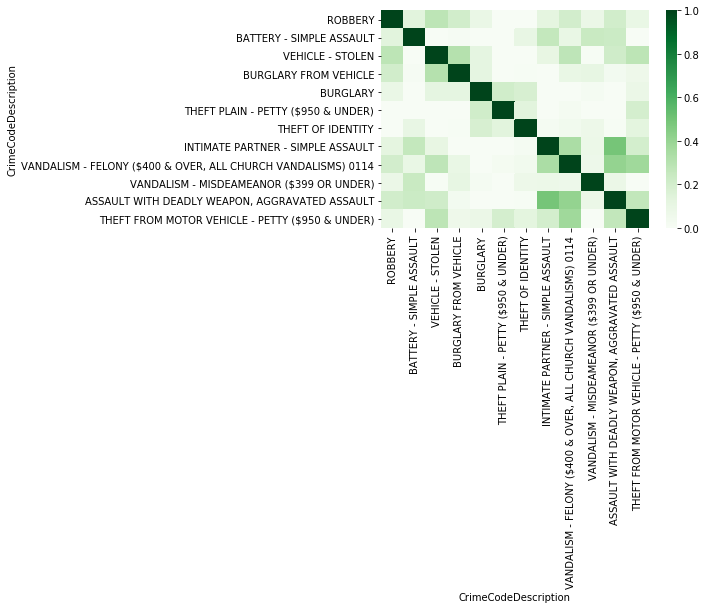

In [12]:
ax = sns.heatmap(corr_matrix_time, cmap="Greens", vmin = 0, vmax = 1, fmt = "")
ax.tick_params(labelsize = 10)

#### 2) Area-wise Correlation
   * From 2010 to 2017, the area-wise correlations are more significant
   * Pairs with significant correlations (>0.5) include: 
      1. robbery & battery simple assault (0.88)
      2. robbery & vandalism under 399 (0.71)
      3. burglary from vehicle & theft of identity (0.69)
      4. vandalism under 399 & battery simple assault (0.67)
      5. burglary & theft of identity (0.62)     

Among all the pairs, robbery - simple assault's high area-wise correlation (>0.88) stood out. This means that areas with a high robbery record are also subject to high battery risks, which we decided to explore further.

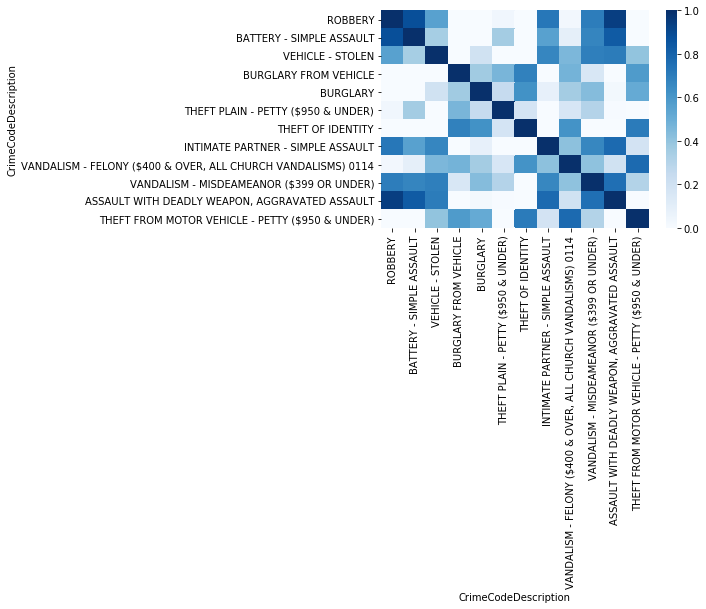

In [13]:
#by area
crimes_area = crime.groupby(['CrimeCodeDescription', 'AreaName'], as_index=['CrimeCodeDescription', 'Area ID']).count().iloc[:,1].unstack(level=0).unstack(level=0).fillna(0)
corr_matrix_area = crimes_area.unstack(0)[selected_crimes].corr()
corr_matrix_area
ax = sns.heatmap(corr_matrix_area, cmap="Blues", vmin = 0, vmax = 1, fmt="CrimeCodeDescription")
ax.tick_params(labelsize = 10)

### Hypotheses of Robbery and Battery Area Correlation
As discovered earlier, robbery and simple assaults have been highly correlated by areas. This could mean several things, including

#### #1: Heavy patrol/security service of the safe neighborhoods have discouraged robbery and battery alike 
if true, we will see very similar crime distributions by area
#### #2: Robbery and battery prefer similar premise conditions. And because each area has certain premise than the others, robbery and battery are correlated by area 
if true, we will see similar robbery & distribution across all premise type
#### #3: Robbers and batters favor certain weapons, which are more easily carried and used in specific regions 
if true, we will see similar weapon-usage for robbery and battery
#### #4: Robbers and simple-assault offenders prefer similar victim profiles which are then correlated with areas
if true, we will see similar victim age/gender/descent for both crimes

### 2.2.1 Hypothesis #1: robbery v. battery: similar area distribution?

In [14]:
rob_dat = crime.loc[crime.CrimeCodeDescription == "ROBBERY",:]
sa_dat = crime.loc[crime.CrimeCodeDescription == "BATTERY - SIMPLE ASSAULT",:]
crime_df = rob_dat.append(sa_dat)

#### Insights:
1. Most Dangerous Areas: 
    * 77th, Southwest, Central and Olympic have been the top crime places. They are mostly located in downtown LA and south LA regions. 


2. Airports: 
   * the heatmap shows several crime centers other than downtown LA and south LA: Santa Monica/Venice Beach, Burbank, Long Beach, and Inglewood. Coincidentally, all those locations are also airport locations (Santa Monica Municipal Airport, Bob Hope Airport in Burbank, Long Beach Airport, and LAX in Inglewood).

3. Similar Area Distribution: 
    * most areas where battery - simple assault incidents are high, robbery cases are also high. On the other hand, whery battery - simple assault incidents are low, robbery cases are most often lower. This confirmed the correlation heat map above that robbery and simple assaults are highly correlated by area.  Note: Battery - Simple Assault with the intent to commit robbery.


Text(0.5, 0, 'Counts of Cases')

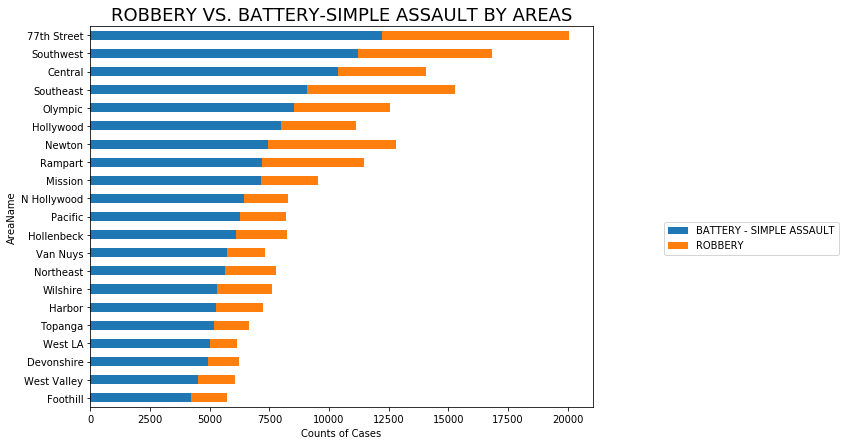

In [15]:
crime_df.groupby("AreaName")["CrimeCodeDescription"].value_counts().unstack().sort_values(by = "BATTERY - SIMPLE ASSAULT",ascending = True).tail(25).plot(kind = "barh",stacked = True, figsize=(9,7))
plt.title("ROBBERY VS. BATTERY-SIMPLE ASSAULT BY AREAS", fontsize = 18)
plt.legend(bbox_to_anchor=(1.5, 0.5), loc=1)
plt.xlabel("Counts of Cases")

#### Robbery Heatmap

In [16]:
rob_data = crime.loc[crime.CrimeCodeDescription == "ROBBERY"]
Location = rob_data.T.tail(7).head(1).transpose().dropna()
len(Location)

63407

In [17]:
Longitude = []
for i in range(0,63407):
    Longitude.append(float(Location.unstack()[i].strip("()").split(",")[0]))

In [18]:
Latitude = []
for i in range(0,63407):
    Latitude.append(float(Location.unstack()[i].strip("()").split(",")[1]))

In [19]:
Loc = np.column_stack([Longitude,Latitude])
LA_COORDINATES = (34.05223, -118.24368)
map1 = folium.Map(location=LA_COORDINATES, zoom_start=10)
map1
map1.add_child(plugins.HeatMap(Loc, radius=13))

### 2.2.2 Hypothesis #2: How are robbery premise compared to battery premise? Similar?
#### Insights:
1. The plot shows that robbery most often occurred in the streets and sidewalks. 
2. Battery-simple assault in the streets and sidewalks are also high compared with Robbery. 
3. In the streets and sidewalks, victims are most likely present where offenders may assault them with the intention to rob or steal. 
4. Most battery - simple assault cases occurred in single family detached homes and multi-unit homes. This may likely include domestic violence and abuse.

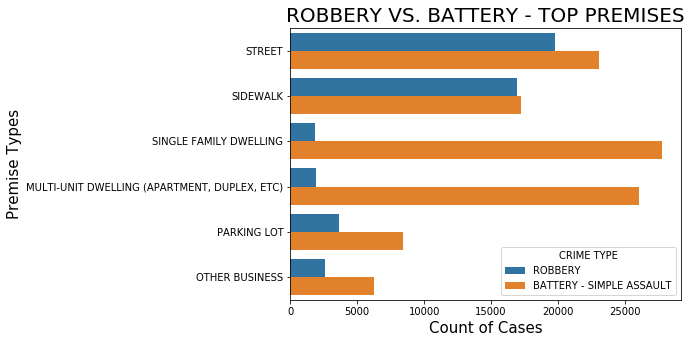

In [20]:
Prem = crime_df["PremiseDescription"]
plt.figure(figsize=(7, 5))
sns.countplot(y = Prem,hue = crime_df["CrimeCodeDescription"],order = Prem.value_counts().head(6).index)
plt.title('ROBBERY VS. BATTERY - TOP PREMISES', size = 20)
plt.xlabel("Count of Cases", fontsize = 15)
plt.ylabel('Premise Types', fontsize = 15)
plt.legend(title = "CRIME TYPE")

### 2.2.3 Hypothesis #3: Are weapons being used by robbers and batters similar?
Weapon used columns have 821 missing values (less than 0.04%). We assumed that the values are either truly missing or no weapons were used.

Insights:
1. Both robbery and simple assault reply heavily on physical strength (strong arm). For robbery, 50% of the cases were reported to be committed with strong arm while simple assault strong arm percentage is an astouding 95%.
2. Robbers have slightly more diverse attacking choices, with 50% of the cases committed using unknown weapons, pepper spray, thrown objects and sticks.

Text(0.5, 1.0, 'Simple Assault Weapon Breakdown')

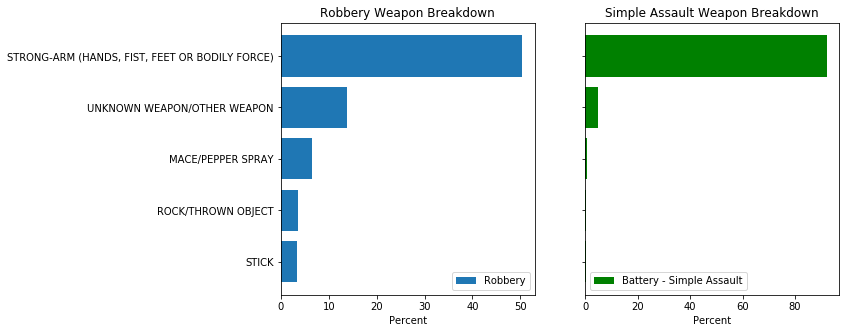

In [21]:
robbery = rob_dat["Weapon Description"].value_counts(normalize = True).sort_values(ascending=True).tail(5)*100
simple_assault = sa_dat["Weapon Description"].value_counts(normalize = True).sort_values(ascending=True).tail(5)*100
fig, (ax, ax1) = plt.subplots(ncols=2, sharey=True,figsize=(10,5))
ax.yaxis.tick_left()
ax.barh(robbery.index ,robbery, label = "Robbery")
ax1.barh(simple_assault.index, simple_assault, color = "green", label = "Battery - Simple Assault")
ax.legend()
ax1.legend()
ax.legend(loc='best')
ax1.legend(loc='best')
ax.set_xlabel('Percent')
ax1.set_xlabel('Percent')
ax.set_title('Robbery Weapon Breakdown')
ax1.set_title('Simple Assault Weapon Breakdown')

### 2.2.4 Robbery and Battery Victim Profiles Are Similar
 * Victim Age
 * Victim Sex
 * Victim Descent

In this section, we explored the victim variables ('victim sex', 'victim age', 'victim descent') and their relations with each other. More specifically, we intended to see if robbery and battery target on similar victim profiles, which could have explained why they are highly correlated by areas. 

Regarding the missing values, both 'victim sex' and 'victim descent' have very little missing values. For variable 'sex age', there's about 7000 missing values (3.3%). We assumed that the age distribution for missing values is similar with the recorded data. 


In [22]:
victim_data = crime[['Area ID', 'AreaName', 'CrimeCodeDescription','VictimAge', 'VictimSex','VictimDescent']].dropna()
sex=['M','F']
victim_genders =victim_data.loc[victim_data.VictimSex.isin(sex)]

#### 1) Victim Age
 1. Age distributions are highly identical because both crimes target mostly on teenagers and young adults (11-40)
 2. Battery simple-assault have seen a significant decrease in teenager victims (10-20)

Text(0.5, 1.0, 'Battery Victim Age Distribution')

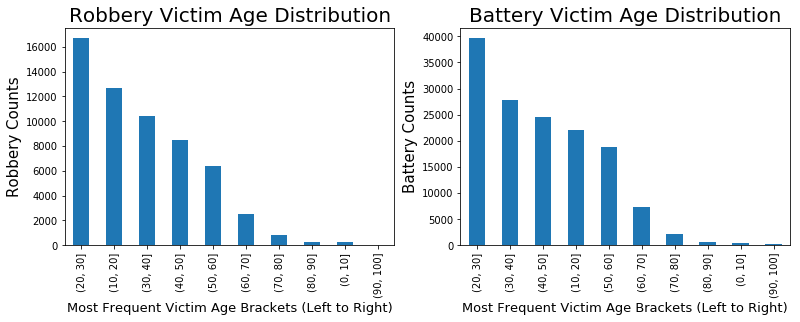

In [23]:
victim_data.groupby(['Area ID']).VictimAge.value_counts().unstack()
plt.figure(figsize = (13,4))
plt.subplot(121)
victim_data['age_cat'] = pd.cut(victim_data.VictimAge, [0,10,20,30,40,50,60,70,80,90,100], right = True)
victim_data.loc[victim_data.CrimeCodeDescription == 'ROBBERY']['age_cat'].value_counts().plot.bar()   
plt.xlabel('Most Frequent Victim Age Brackets (Left to Right)', fontsize = 13)
plt.ylabel('Robbery Counts', fontsize = 15)
plt.title('Robbery Victim Age Distribution', fontsize = 20)

plt.subplot(122)
victim_data['age_cat'] = pd.cut(victim_data.VictimAge, [0,10,20,30,40,50,60,70,80,90,100], right = True)
victim_data.loc[victim_data.CrimeCodeDescription == 'BATTERY - SIMPLE ASSAULT']['age_cat'].value_counts().plot.bar()   
plt.xlabel('Most Frequent Victim Age Brackets (Left to Right)', fontsize = 13)
plt.ylabel('Battery Counts', fontsize = 15)
plt.title('Battery Victim Age Distribution', fontsize = 20)

####  2) Victim Gender
1. Robbery and battery (simple assault) differ significantly in victim gender breakdown. For robbery, there are 110% more male victims than female victims. This trend holds trues for all areas. For battery, male victims are actually outnumbered by female victims but the difference is marginal. 
2. Also interestingly, robbery has a higher non-binary/genderless victim proportion (0.75%) compared to less than 0.01% for battery.

In [24]:
print(crime.loc[crime.CrimeCodeDescription == 'ROBBERY']['VictimSex'].value_counts())
print(crime.loc[crime.CrimeCodeDescription == 'BATTERY - SIMPLE ASSAULT']['VictimSex'].value_counts())

M    42988
F    19008
X     1358
H        4
Name: VictimSex, dtype: int64
F    77588
M    68070
X       90
H        8
Name: VictimSex, dtype: int64


Text(0.5, 0.98, 'Victim Gender Breakdown - Robbery (Left) v. Battery (Right)')

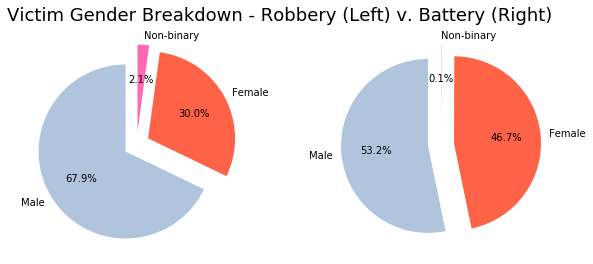

In [25]:
plt.figure(figsize = (10,4))
plt.subplots_adjust(wspace = 0.2)
plt.subplot(121)
gender_label = ['Male', 'Female', 'Non-binary']
plt.pie(crime_df.loc[crime_df.CrimeCodeDescription == 'ROBBERY']["VictimSex"].value_counts()[:3],
       labels=gender_label, 
       startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("lightsteelblue","tomato", 'hotpink'))
#plt.title('Victim Genders - Robbery', fontsize = 12)
#fig.tight_layout()

plt.subplot(122)
plt.pie(crime_df.loc[crime_df.CrimeCodeDescription == 'BATTERY - SIMPLE ASSAULT']["VictimSex"].value_counts()[:3],
       labels=gender_label, 
       startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("lightsteelblue","tomato", 'hotpink'))
plt.suptitle('Victim Gender Breakdown - Robbery (Left) v. Battery (Right)', fontsize = 18)

####  3) Victim Descent
In this part, we looked at top 3 victim descents for robbery and battery. We compared them to the victim descent breakdown for all crimes. We found that top 3 victim descent breakdown for battery is very close to all crimes average. On the other hand, robbery has seen around 10% more hispanic victims. This made us wonder if robbers have targeted specifically on people of hispanic descent, which we further investigated in the next section.

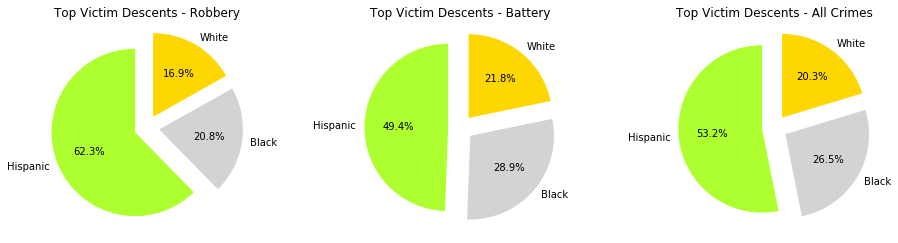

In [26]:
plt.figure(figsize = (15,8))
plt.subplots_adjust(wspace = 0.5)
descent_label = ['Hispanic', 'Black', 'White']
plt.subplot(131)
plt.pie(crime_df.loc[crime_df.CrimeCodeDescription == 'ROBBERY']["VictimDescent"].value_counts()[:3],
       labels=descent_label, 
       startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("greenyellow","lightgrey","gold"))
plt.title('Top Victim Descents - Robbery')
fig.tight_layout()

plt.subplot(132)
plt.pie(crime_df.loc[crime_df.CrimeCodeDescription == 'BATTERY - SIMPLE ASSAULT']["VictimDescent"].value_counts()[:3],
       labels=descent_label, 
       startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("greenyellow","lightgrey","gold"))
plt.title('Top Victim Descents - Battery')
fig.tight_layout()

plt.subplot(133)
plt.pie(crime_df["VictimDescent"].value_counts()[:3],
       labels=descent_label, 
       startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("greenyellow","lightgrey","gold"))
plt.title('Top Victim Descents - All Crimes')
fig.tight_layout()

### 2.2.5 Hispanic Victim are Robbers' Favorite?
#### Hispanic Victim Heatmap v. LA  Ethnicity Map

In this section, we intended to answer the question: do robbers target more on hispanic victims. We attempted to answer this question by plotting a heatmap of hispanic victims and compare it to a LA ethnicity map. The comparison shows that areas with a good amount of hispanic residents are those that have a high hispanic victims. And the areas that have a low hispanic resident density also have low hispanic victim density.

We also run the maps for other ethnicities and it seems that the occurrence of robbery is fairly random regarding victim ethinicity. This implies that robbers don't specifically target on hispanic people than other crimes. 

In [27]:
#robbery with hispanic victims
rob_hispanic = crime.loc[crime.CrimeCodeDescription == "ROBBERY"].loc[crime.VictimDescent == "H"]
Location = rob_hispanic.T.tail(7).head(1)
Location = Location.dropna()
Location = Location.transpose()
len(Location)

33513

In [28]:
Longitude = []
for i in range(0,33513):
    Longitude.append(float(Location.unstack()[i].strip("()").split(",")[0]))

In [29]:
Latitude = []
for i in range(0,33513):
    Latitude.append(float(Location.unstack()[i].strip("()").split(",")[1]))

In [30]:
Loc = np.column_stack([Longitude,Latitude])
LA_COORDINATES = (34.05223, -118.24368)
map1 = folium.Map(location=LA_COORDINATES, zoom_start=10)
map1
map1.add_child(plugins.HeatMap(Loc, radius=13))
# heatmap of Robbery for Hispanic

#### LA Ethnicity Map

<img src="LA_Demographics_Map.png">

### Part III: Trend Analysis
 * 3.1 trend within a day
 * 3.2 trend within a week
 * 3.3 trend within a year
 * 3.4 trend over years
 * 3.5 reporting delay

#### 3.1 trend within a day
Insights: 
1. Robbery reaches its peak around late evening (on average ~4000 counts at 21:00)
2. Robbery tends to die down starting 22:00 and hits rock bottom in the early morning (6am)
3. The plot has shown a distinct daily seasonality pattern where the peak hours have about 3 times more robbery cases than the idle hours.

Text(0.5, 0, 'Hour Occurred')

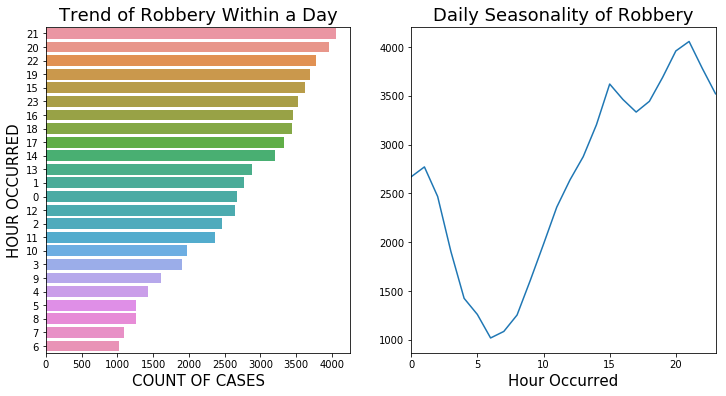

In [31]:
Hour = rob_dat["HourOccurred"]
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.countplot(y = Hour, order = Hour.value_counts(normalize = True).index)
plt.xlabel("COUNT OF CASES", size = 15)
plt.ylabel("HOUR OCCURRED", size = 15)
plt.title("Trend of Robbery Within a Day", size = 18)

plt.subplot(122)
ax = crime.loc[crime.CrimeCodeDescription=='ROBBERY'].groupby('HourOccurred')['CrimeCodeDescription'].count().plot()
ax.set_title("Daily Seasonality of Robbery", fontsize = 18)
ax.set_xlabel('Hour Occurred', fontsize = 15)

#### 2. Trend Within a Week
Insights:
Robbery has happened ~12% more on weekends than weekdays. This may be due to the fact that robbery happened outdoor, and people generally spend more time outdoor on the weekend when they don't have school/work. More importantly, we recognized a distinct weekly seasonality pattern for robbery.

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

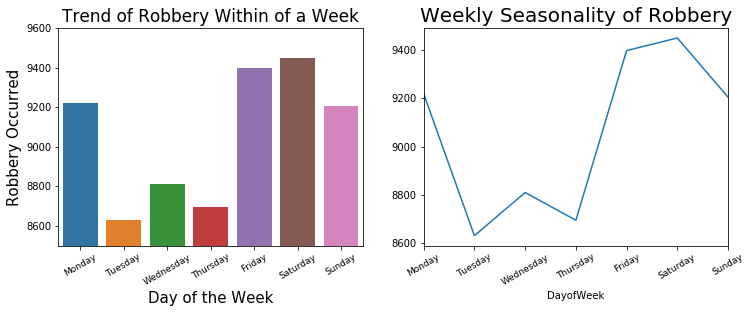

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.barplot(x=rob_dat["DayofWeek"].value_counts().index, y=rob_dat["DayofWeek"].value_counts())
plt.title("Trend of Robbery Within of a Week", fontsize = 17)
plt.xticks(np.arange(7), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
                   fontsize=9, rotation = 30)
plt.xlabel("Day of the Week", fontsize = 15)
plt.ylabel("Robbery Occurred", fontsize = 15)
plt.ylim(8500, 9600)

plt.subplot(122)
ax = crime.loc[crime.CrimeCodeDescription=='ROBBERY'].groupby('DayofWeek')['CrimeCodeDescription'].count().plot()
ax.set_title("Weekly Seasonality of Robbery", fontsize = 20)
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
                   fontsize=9, rotation = 30)

#### 3. Trend Within a Year
Insights:
Our count plots show that robbery counts reach the peak during the summer and hit the bottom during the winter. Our hypothesis is that victims spend more time outdoor during the summer when the weather is nice, which provides robbers an opportunity to rob. We wonder if this monthly pattern is consistent across all years from 2010 to 2017.

(4500, 6200)

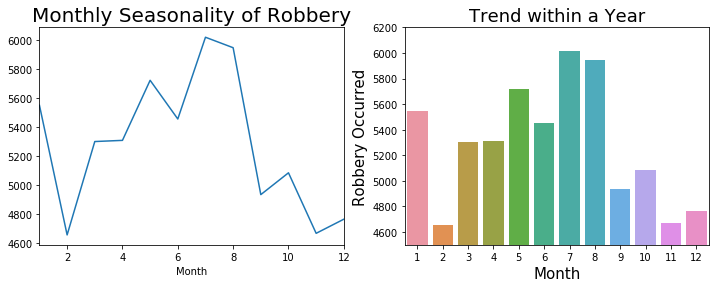

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
ax = crime.loc[crime.CrimeCodeDescription=='ROBBERY'].groupby('Month')['CrimeCodeDescription'].count().plot()
ax.set_title("Monthly Seasonality of Robbery", fontsize = 20)

plt.subplot(122)
ax1 = sns.barplot(x=rob_dat["Month"].value_counts().index, y=rob_dat["Month"].value_counts())
ax1.set_title("Trend within a Year", fontsize = 18)
ax1.set_xlabel("Month", fontsize = 15)
ax1.set_ylabel("Robbery Occurred", fontsize = 15)
ax1.set_ylim(4500, 6200)

#### 4. Trend Over Years
Insights:
1. The bigger picture is that starting from 2010, the monthly counts of robbery has decreased and hit rock bottom at Febuary 2014 (422 cases of robbery). After Feb. 2014, the monthly counts of robbery kept rising from 2014 to August 2017.

2. September 2017 had abnormally low record of robbery; may because the recent cases had not been in file at the time the data was released.

3. Within each year, the monthly seasonality persists: peak in summer and bottom in winter. We intended to decompose this plot into trend, seasonality and residuals and analyze further in the model section.


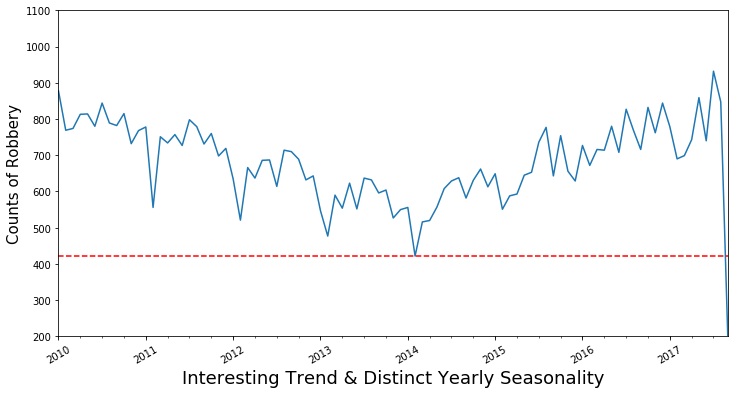

In [34]:
plt.figure(figsize = (12,6))
crime['Year_Month'] = crime['DateOccurred'].dt.to_period('M')
over_years_trend = crime.loc[crime.CrimeCodeDescription=='ROBBERY'].groupby('Year_Month')['CrimeCodeDescription'].count().plot()
over_years_trend.set_xticklabels(["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"],rotation = 30)
#over_years_trend.set_title("Trend of Robbery 2010-2017", fontsize = 18)
over_years_trend.set_ylim(200, 1100)
over_years_trend.set_ylabel('Counts of Robbery', fontsize = 15)
over_years_trend.set_xlabel('Interesting Trend & Distinct Yearly Seasonality', fontsize = 18)
over_years_trend.axhline(y = 422, linestyle = "--", color = "red")
#over_years_trend.grid()
#unemployment rate, GDP, interest rate

#### 5. Report Delay
Insights:
1. The reporting delay across all crime types in Los Angeles is 16.4 days
2. The reporting of robbery is significantly faster (1.59 days) than the average delay of all crimes or the delay for battery (3.319)

In [35]:
crime['ReportDelay'] = (crime['DateReported']-crime['DateOccurred']).astype('timedelta64[D]')

In [36]:
crime["ReportDelay"].mean()  #overall delay 16.4 days

16.41938855632336

In [37]:
crime.loc[crime.CrimeCodeDescription == "ROBBERY",:]["ReportDelay"].mean() #robbery delay 1.58 days

1.5870552611657835

In [38]:
crime.loc[crime.CrimeCodeDescription == "BATTERY - SIMPLE ASSAULT",:]["ReportDelay"].mean() #robbery delay 1.58 days

3.3190296843592857

### Special Section: Juvenile Robbers

Just out of curiosity, we explored what are the top crimes committed by juveniles and what are typical victim profile by a juvenile delinquent. Here's what we've found:

#### Top 5 Crimes Overall vs. Top 5 Juvenile Crimes
Going in, we thought that shop-lifting and theft are the most frequently committed by juveniles. The graph shows that both battery and burglary are ranked high in both overall counts and juvenile delinquents counts. Robbery is ranked the second by juveniles while overall it is only ranked the 12th most frequent crimes.

In [39]:
crime_juv = crime[['Area ID','AreaName','HourOccurred','Year','Month','DayofWeek','CrimeCodeDescription','StatusDescription','VictimAge', 'VictimSex','VictimDescent','PremiseDescription']].dropna()
young = ['Juv Arrest','Juv Other']
crime_juv=crime_juv.loc[crime_juv.StatusDescription.isin(young)]

Text(0.5, 1.0, 'Top 5 Crimes Committed By Juvenile')

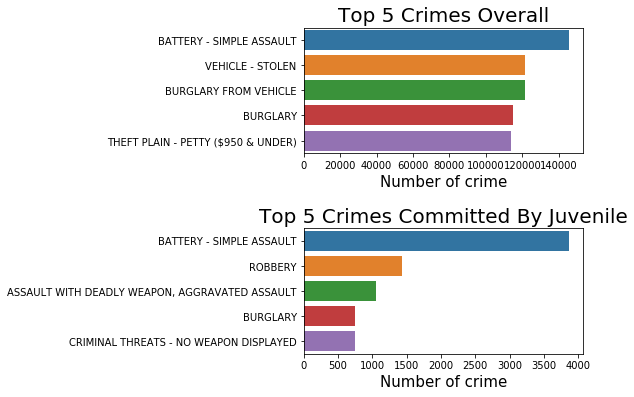

In [40]:
plt.figure(figsize = (5,6))
plt.subplot(211)
plt.subplots_adjust(hspace = 0.6)
sns.barplot(y = crime['CrimeCodeDescription'].value_counts().index[0:5],
                x = crime['CrimeCodeDescription'].value_counts().head(5))
plt.xlabel('Number of crime', fontsize = 15)
plt.title('Top 5 Crimes Overall', fontsize = 20)

plt.subplot(212)
sns.barplot(y=crime_juv['CrimeCodeDescription'].value_counts().index[0:5],
                  x=crime_juv['CrimeCodeDescription'].value_counts().head(5))
plt.xlabel('Number of crime', fontsize = 15)
plt.title('Top 5 Crimes Committed By Juvenile', fontsize = 20)

Text(0.5, 0, 'Hour Occurred')

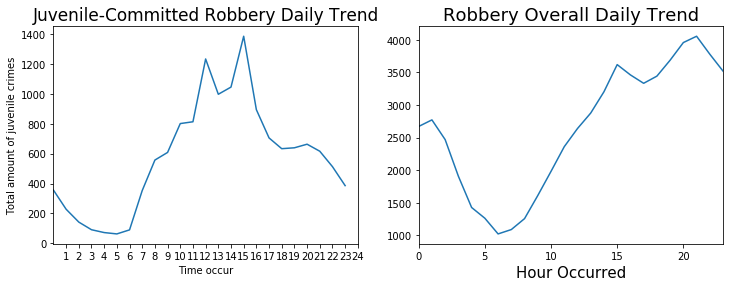

In [41]:
plt.figure(figsize = (12,4))
plt.subplot(121)
crime_juv.groupby('HourOccurred')['CrimeCodeDescription'].count().plot()
plt.xticks(range(1,25))
plt.xlabel('Time occur')
plt.ylabel('Total amount of juvenile crimes')
plt.title('Juvenile-Committed Robbery Daily Trend', fontsize = 17) #afternoon is a peak for juvenile crimes

plt.subplot(122)
ax = crime.loc[crime.CrimeCodeDescription=='ROBBERY'].groupby('HourOccurred')['CrimeCodeDescription'].count().plot()
ax.set_title("Robbery Overall Daily Trend", fontsize = 18)
ax.set_xlabel('Hour Occurred', fontsize = 15)

Text(0.5, 1.0, 'Robbery Overall Yearly Trend')

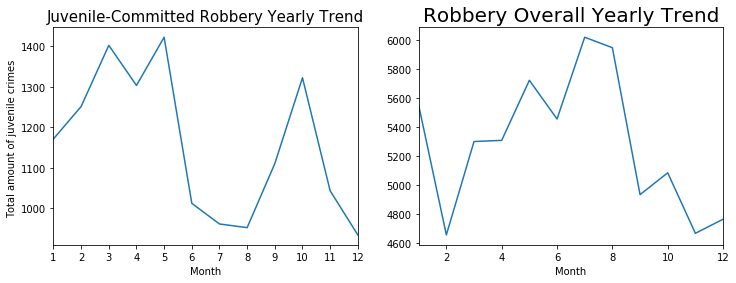

In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
crime_juv.groupby('Month')['CrimeCodeDescription'].count().plot()
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Total amount of juvenile crimes ')
plt.title('Juvenile-Committed Robbery Yearly Trend', fontsize = 15)

plt.subplot(122)
ax = crime.loc[crime.CrimeCodeDescription=='ROBBERY'].groupby('Month')['CrimeCodeDescription'].count().plot()
ax.set_title("Robbery Overall Yearly Trend", fontsize = 20)

## Part III: Data Modeling (Time Series)
 * 3.1 Trend Decomposition
 * 3.2 Trend Stationarization
 * 3.3 Parameter Testing
 * 3.4 Model Selection

In [43]:
timeseries = crime.loc[crime.CrimeCodeDescription=='ROBBERY'].groupby('Date')['CrimeCodeDescription'].count()
#get rid of 2017-09 because it's abnormally low (maybe recent cases aren't in file yet)
timeseries = timeseries[:"2017-08"] 

### 3.1 Trend Decomposition
we decomposed la robbery counts from 2010- 2017 into three parts: trend, seasonality & residuals. Th decomposed trend is interesting as it took a dip around Feb, 2014 before it went back up again. More importantly, it intuitively tells us that the trend is not stationary. The seasonality is consistent and significant, which we need to consider in the model.

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(timeseries)
trend = decomp.trend
seasonality = decomp.seasonal
residual = decomp.resid

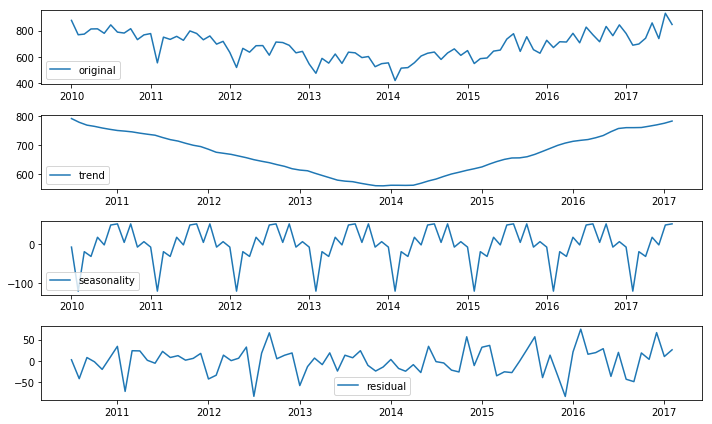

In [45]:
plt.figure(figsize = (10,6))
plt.subplot(411)
plt.plot(timeseries, label = "original", linewidth = 1.5)
plt.legend(loc = "best")
plt.subplot(412)
plt.plot(trend, label = "trend", linewidth = 1.5)
plt.legend(loc = "best")
plt.subplot(413)
plt.plot(seasonality, label = "seasonality", linewidth = 1.5)
plt.legend(loc = "best")
plt.subplot(414)
plt.plot(residual, label = "residual", linewidth = 1.5)
plt.legend(loc = "best")
#.xticklabels(["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], fontsize=12, rotation = 30)
#plt.xticks()
plt.tight_layout()

###  3.2  Trend Stationarization
In a time series, we know that observations are time dependent. It turns out that a lot of nice results that hold for independent random variables hold for stationary random variables. So by making the data stationary, we can actually apply regression techniques to this time dependent variable.

In [46]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):   
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
#Plot rolling statistics:
    plt.figure(figsize = (6,4))
    plt.plot(timeseries, color='blue',label='Original', linewidth = 1.5)
    plt.plot(rolmean, color='red', label='Rolling Mean', linewidth = 1.5)
    plt.plot(rolstd, color='black', label = 'Rolling Std', linewidth = 1.5)
    plt.legend(loc='center right', fontsize = "small", bbox_to_anchor=(1, 0.3))
    plt.title('Rolling Mean & Standard Deviation', fontsize = 18)
    plt.xticks(["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], 
                   fontsize=12, rotation = 30)
    plt.show()
    
#Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Comments: 
1. LA robbery trend (2010-2017) has shown a distinct pattern of seasonality. The Dicky-Fuller test confirms the non-stationarity, as the p-value is very large. We need to first take differencing
2. At the same time, the trend is non-stationary because test statistics is bigger than all critical values, and rolling mean is moving drastically compared to rolling standard deviation

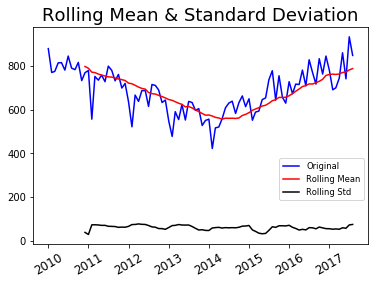

Results of Dickey-Fuller Test:
Test Statistic                 -0.712359
p-value                         0.843522
#Lags Used                     12.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


In [47]:
test_stationarity(timeseries)

#### Four Transformations

#### Transformation 1: first order differencing
p value still not significant, indicating non-stationarity

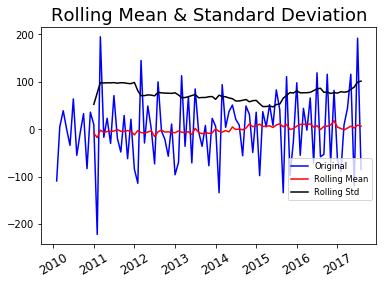

Results of Dickey-Fuller Test:
Test Statistic                 -2.404335
p-value                         0.140517
#Lags Used                     12.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


In [48]:
first_diff = timeseries - timeseries.shift(1)
test_stationarity(first_diff.dropna(inplace = False))

#### Transformation 2: seasonal difference
not significant!

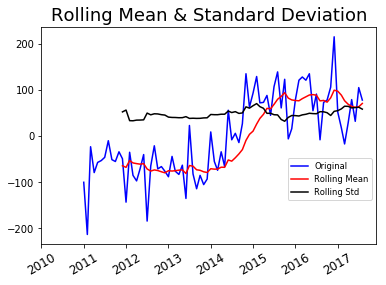

Results of Dickey-Fuller Test:
Test Statistic                 -1.175765
p-value                         0.683933
#Lags Used                     11.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [49]:
seasonal_diff = timeseries - timeseries.shift(12)
test_stationarity(seasonal_diff.dropna(inplace = False))

#### Transformation 3: seasonal first order differencing
still not significant

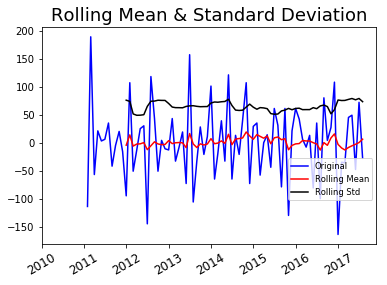

Results of Dickey-Fuller Test:
Test Statistic                 -2.056399
p-value                         0.262404
#Lags Used                     12.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


In [50]:
seasonal_first_diff = first_diff - first_diff.shift(12)
test_stationarity(seasonal_first_diff.dropna(inplace = False))

#### Transformation 4: Second Order Differencing
The test statistics is smaller than the 5% critical values. That tells us that we are 95% confident that this series is stationary. This also tells us that our d parameter is 2, as we took 2nd differencing order.

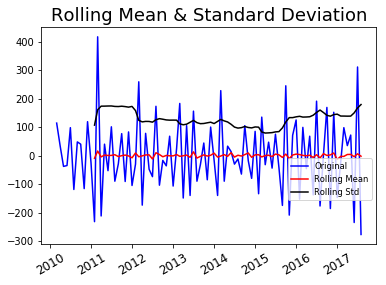

Results of Dickey-Fuller Test:
Test Statistic                -6.720698e+00
p-value                        3.489189e-09
#Lags Used                     1.200000e+01
Number of Observations Used    7.700000e+01
Critical Value (1%)           -3.518281e+00
Critical Value (5%)           -2.899878e+00
Critical Value (10%)          -2.587223e+00
dtype: float64


In [51]:
second_diff = (first_diff - first_diff.shift(1)).dropna(inplace = False)
test_stationarity(second_diff)

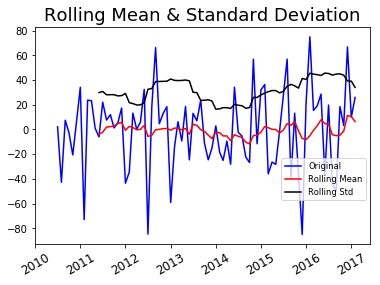

Results of Dickey-Fuller Test:
Test Statistic                -6.853710e+00
p-value                        1.669046e-09
#Lags Used                     3.000000e+00
Number of Observations Used    7.600000e+01
Critical Value (1%)           -3.519481e+00
Critical Value (5%)           -2.900395e+00
Critical Value (10%)          -2.587498e+00
dtype: float64


In [52]:
#residuals are also stationary
second_diff_decompose = residual.dropna(inplace = False)
test_stationarity(second_diff_decompose)

### 3.3 Parameter Testing
Results: p = q = 1, d = 2
* p : 1st autoregressive (AR) order 
* d : 2nd non-seasonal differencing order
* q : 1st moving average (MA) order

In [53]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(second_diff, nlags = 20)
lag_pacf = pacf(second_diff, nlags = 20, method = 'ols')

Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version)

Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p)

In this graph, 
* p: The first time where the PACF crosses the upper confidence interval, here its close to 1. hence p = 1
* q: The first time where the ACF crosses the upper confidence interval, here its close to 1. hence p = 1

Text(0.5, 1.0, 'Partial Autocorrelation Function')

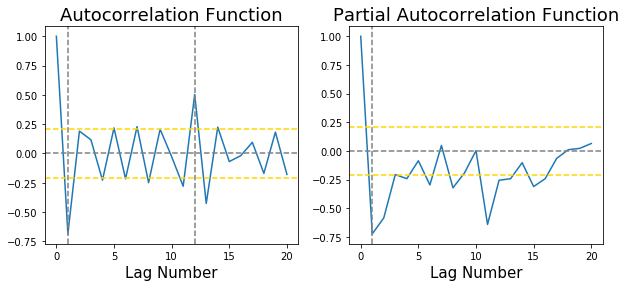

In [54]:
#plot ACF
#p = 1
plt.figure(figsize = (10,4))
plt.subplot(121)
plt.plot(lag_acf, linewidth = 1.5)
plt.axvline(x = 1, linestyle = "--", color = "grey")
plt.axhline(y = 0, linestyle = "--", color = "grey")
plt.axhline(y = -1.96/np.sqrt(len(second_diff)), linestyle = "--", color = "gold")
plt.axhline(y = 1.96/np.sqrt(len(second_diff)), linestyle = "--", color = "gold")
plt.axvline(x = 12, linestyle = "--", color = "grey")
plt.xlabel("Lag Number", fontsize = 15)
plt.title("Autocorrelation Function", fontsize = 18)

#plot PACF
#q = 1
plt.subplot(122)
plt.plot(lag_pacf, linewidth = 1.5)
plt.axvline(x = 1, linestyle = "--", color = "grey")
plt.axhline(y = 0, linestyle = "--", color = "grey")
plt.axhline(y = -1.96/np.sqrt(len(second_diff)), linestyle = "--", color = "gold")
plt.axhline(y = 1.96/np.sqrt(len(second_diff)), linestyle = "--", color = "gold")
plt.xlabel("Lag Number", fontsize = 15)
plt.title("Partial Autocorrelation Function", fontsize = 18)

### 3.4 Model Selection
#### 3.4.1 ARIMA (Autoregressive Integrated Moving Average) Modeling
ARIMA models are a combination of AR and MA models, in which the current value of the time series is expressed linearly in terms of its previous values and in terms of current and previous residual series. It, however, does not consider seasonality. ARIMA forecast could not track the seasonal relationships between variables.

In [55]:
model = ARIMA(timeseries, order=(1,2,1))
model_fit = model.fit(disp= 0)
print(model_fit.summary())

                                ARIMA Model Results                                
Dep. Variable:     D2.CrimeCodeDescription   No. Observations:                   90
Model:                      ARIMA(1, 2, 1)   Log Likelihood                -504.887
Method:                            css-mle   S.D. of innovations             64.042
Date:                     Thu, 06 Jun 2019   AIC                           1017.775
Time:                             11:14:46   BIC                           1027.774
Sample:                         03-01-2010   HQIC                          1021.807
                              - 08-01-2017                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2565      0.170      1.506      0.136      -0.077       0.590
ar.L1.D2.CrimeCodeDescription    -

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


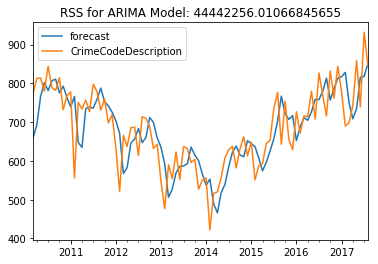

In [56]:
model_fit.plot_predict(dynamic=False)
plt.title('RSS for ARIMA Model: %1.11f'% sum(((model_fit.fittedvalues - timeseries).dropna())**2))
plt.show()

#### Arima Prediction

In [57]:
new_data = pd.read_csv("Crime_Data_from_2010_to_Present.csv")
new_data['Date Reported'] =  pd.to_datetime(new_data['Date Reported'], format='%m/%d/%Y')
new_data['Date Occurred'] =  pd.to_datetime(new_data['Date Occurred'], format='%m/%d/%Y')

new_data.rename(columns={'Date Reported': 'DateReported', 'Date Occurred': 'DateOccurred','Time Occurred':'TimeOccurred',
                      'Area Name':'AreaName','Reporting District':'ReportingDistrict','Crime Code Description':'CrimeCodeDescription',
                      'Victim Age':'VictimAge','Victim Sex':'VictimSex','Victim Descent':'VictimDescent','Premise Description':'PremiseDescription',
                     'Status Description':'StatusDescription', 'Crime Code 1':'CrimeCode1','Crime Code 2':'CrimeCode2', 'Crime Code 3':'CrimeCode3',
                     'Crime Code 4':'CrimeCode4'}, inplace=True)

In [58]:
new_data['year_month'] = new_data['DateOccurred'].dt.to_period('M')
new_data['date'] =  new_data['year_month'].astype(str) + '-01'
new_data['date'] =  pd.to_datetime(new_data['date'], format='%Y-%m-%d')
new_robbery = new_data.loc[new_data.CrimeCodeDescription == 'ROBBERY']

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


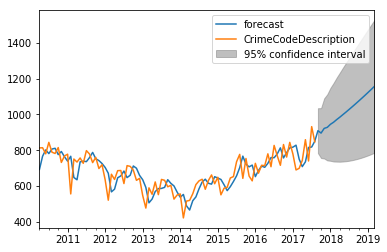

In [59]:
forecast = model_fit.plot_predict(start = 3, end = 110, dynamic= False)

#### 3.4.2. SARIMA (Seasonal Autoregressive Integrated Moving Average) Modeling
SARIMA model is extended from ARIMA to support the seasonal component of the series. SARIMA method for time series forecasting is used on univariate data and contains trends and seasonality. SARIMA is composed of trend and seasonal elements of the series. Our SARIMA forecast captured seasonality, which is why we chose this over ARIMA model.

* P: Seasonal autoregressive order
* D: Seasonal difference order
* Q: Seasonal moving average order
* m: The number of time steps for a single seasonal period

#### Justifications
1. P = 1: Because the autocorrelation of the differenced series is positive at lag 12 (one year later), I should include an SAR term to the model
2. D = 0: No seasonal differencing order applied
3. Q = 0: Trying out different terms, I found that adding an SMA term does not improve the accuracy of the prediction much. By not including this term, I wanted to avoid overfitting.
4. m = 12: Seasonality cycle is a year

In [60]:
mod = sm.tsa.statespace.SARIMAX(timeseries,order = (1,2,1), seasonal_order = (1,0,0,12))  
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:               CrimeCodeDescription   No. Observations:                   92
Model:             SARIMAX(1, 2, 1)x(1, 0, 0, 12)   Log Likelihood                -488.202
Date:                            Thu, 06 Jun 2019   AIC                            984.405
Time:                                    11:15:10   BIC                            994.404
Sample:                                01-01-2010   HQIC                           988.437
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4864      0.078     -6.249      0.000      -0.639      -0.334
ma.L1         -0.9997      1.778   

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


#### SARIMA Forecasting

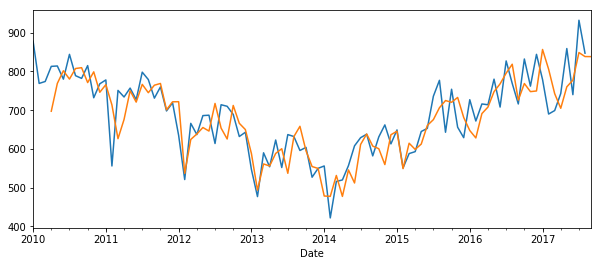

In [61]:
plt.figure(figsize = (10, 4))
forecast1 = results.predict(start = 3, end = 92, dynamic = False)
timeseries.plot(linewidth = 1.5)
forecast1.plot(linewidth = 1.5)

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


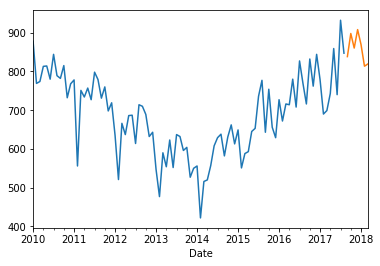

In [62]:
forecast_more = results.predict(start = 92, end = 98, dynamic= False)  
timeseries.plot(linewidth = 1.5)
forecast_more.plot(linewidth = 1.5)

### Validation Using 2018 Data
Results
* SARIMA model predicted the trend and seasonality well, as it fitted the actual values.
* Trend is harder to predict

In [63]:
new_data = pd.read_csv("Crime_Data_from_2010_to_Present.csv")
new_data['Date Reported'] =  pd.to_datetime(new_data['Date Reported'], format='%m/%d/%Y')
new_data['Date Occurred'] =  pd.to_datetime(new_data['Date Occurred'], format='%m/%d/%Y')

new_data.rename(columns={'Date Reported': 'DateReported', 'Date Occurred': 'DateOccurred','Time Occurred':'TimeOccurred',
                      'Area Name':'AreaName','Reporting District':'ReportingDistrict','Crime Code Description':'CrimeCodeDescription',
                      'Victim Age':'VictimAge','Victim Sex':'VictimSex','Victim Descent':'VictimDescent','Premise Description':'PremiseDescription',
                     'Status Description':'StatusDescription', 'Crime Code 1':'CrimeCode1','Crime Code 2':'CrimeCode2', 'Crime Code 3':'CrimeCode3',
                     'Crime Code 4':'CrimeCode4'}, inplace=True)

In [64]:
new_data['year_month'] = new_data['DateOccurred'].dt.to_period('M')
new_data['date'] =  new_data['year_month'].astype(str) + '-01'
new_data['date'] =  pd.to_datetime(new_data['date'], format='%Y-%m-%d')
new_robbery = new_data.loc[new_data.CrimeCodeDescription == 'ROBBERY']

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


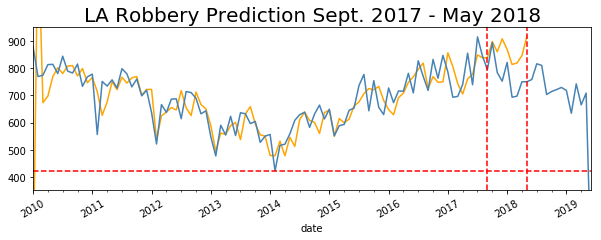

In [65]:
plt.figure(figsize = (10, 3))

#with forecasted values
forecast18 = results.predict(start = 0, end = 100, dynamic= False)  
forecast18.plot(linewidth = 1.5, color = 'orange')

over_years_trend = new_robbery.groupby('date')['CrimeCodeDescription'].count().plot(color = 'steelblue')
over_years_trend.set_xticklabels(["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"],rotation = 30)
over_years_trend.set_title("LA Robbery Prediction Sept. 2017 - May 2018", fontsize = 20)
over_years_trend.set_ylim(350, 950)
over_years_trend.axhline(y = 422, linestyle = "--", color = "red")
over_years_trend.axvline(pd.Timestamp('2017-09'), linestyle = "--", color = "red")
over_years_trend.axvline(pd.Timestamp('2018-05'), linestyle = "--", color = "red")
#over_years_trend.set_xlim(datetime.date(2010,1), datetime.date(2019,5))
#over_years_trend.grid()

## Part IV: Discussions & Conclusions

Regarding robbery and battery, the findings reveal both differences and similarity in the locations, victims’ profile, weapon that offenders used, days and times that the incidents occurred. The risky areas in Los Angeles for robberies are mainly in downtown and South LA. Other risky centers map around areas that have an airport (Santa Monica, Burbank, Inglewood, etc). More importantly, the area distribution for both crimes are strikingly similar, which indicates a strong correlation by area. For premises, people in street and sidewalk are more likely to be robbed than other premises. The weapon that both crime offenders mainly used is strong – arm. Target victims consist of more male population than female and most common ethnicity groups consist of Hispanic, Black and White. It seems that robbery is higher during the evenings on Fridays and weekends. Trends show crimes peak during the summers. Throughout the years 2010 to 2017, the amount of robberies went down before year 2014; that may be due to the decrease in unemployment rate. However, the amount went up starting 2015 after California passed proposition 47. In the end, according to our model, the Robbery that will happen in LA will decrease in general, which corresponds to the real data.

These findings may be helpful for communities in creating interventions programs and policies for reducing crimes in LA. 

In the future, we want to make our findings more informative and preventive. Currently, our project focuses mainly on robbery and only used battery as comparison. It would be interesting to analyze other crimes and comparisons. More preventive means that we want to further study the probable causes for robbery as there can be many. The results may be different when applied to different crimes.

#Citation
* https://www.kaggle.com/cityofLA/crime-in-los-angeles
    
* https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq

* https://calmatters.org/articles/homeless-in-california-what-the-data-reveals/

* https://fred.stlouisfed.org/series/CAUR

* https://en.wikipedia.org/wiki/2014_California_Proposition_47

